# Lab Exercise 9: Image Morphing and Blending 
•	Objective: Morph one image into another and blend images using various techniques. 

•	Task: Implement image morphing and blending (alpha blending and multiband blending) to create seamless transitions between two images

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


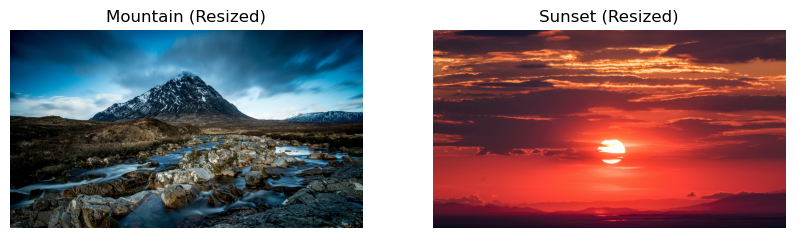

In [2]:
# Load the two images
img1 = cv2.imread("mountain view.jpg")  # Mountain image
img2 = cv2.imread("sunset.jpg")   # Sunset image

# Define the target size (16:9 resolution)
target_width = 1920  # Example width
target_height = 1080  # Example height

# Resize images to 16:9 aspect ratio
img1 = cv2.resize(img1, (target_width, target_height))
img2 = cv2.resize(img2, (target_width, target_height))

# Display the resized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Mountain (Resized)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Sunset (Resized)")
plt.axis('off')
plt.show()


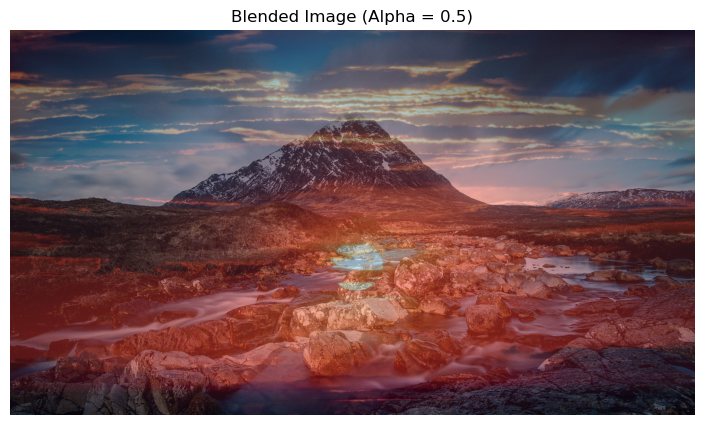

In [3]:
# Alpha blending
alpha = 0.5  # Adjust alpha (0 = only img2, 1 = only img1)
blended = cv2.addWeighted(img1, alpha, img2, 1 - alpha, 0)

# Display the blended image
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
plt.title(f"Blended Image (Alpha = {alpha})")
plt.axis('off')
plt.show()


In [5]:
def multiband_blend(img1, img2, levels=5):
    # Generate Gaussian pyramids
    gp1 = [img1]
    gp2 = [img2]
    for _ in range(levels):
        img1 = cv2.pyrDown(gp1[-1])
        img2 = cv2.pyrDown(gp2[-1])
        gp1.append(img1)
        gp2.append(img2)
    
    # Generate Laplacian pyramids
    lp1 = [gp1[-1]]  # The smallest level of the Gaussian pyramid
    lp2 = [gp2[-1]]  # The smallest level of the Gaussian pyramid
    for i in range(levels - 1, 0, -1):
        # Upsample the smaller image to match the size of the next level
        size = (gp1[i - 1].shape[1], gp1[i - 1].shape[0])
        lap1 = cv2.subtract(gp1[i - 1], cv2.pyrUp(gp1[i], dstsize=size))
        lap2 = cv2.subtract(gp2[i - 1], cv2.pyrUp(gp2[i], dstsize=size))
        lp1.append(lap1)
        lp2.append(lap2)
    
    # Blend the Laplacian pyramids
    blended_pyramid = []
    for l1, l2 in zip(lp1, lp2):
        rows, cols, _ = l1.shape
        blended = np.hstack((l1[:, :cols // 2], l2[:, cols // 2:]))
        blended_pyramid.append(blended)
    
    # Reconstruct the blended image
    blended_image = blended_pyramid[0]
    for i in range(1, levels):
        size = (blended_pyramid[i].shape[1], blended_pyramid[i].shape[0])
        blended_image = cv2.add(cv2.pyrUp(blended_image, dstsize=size), blended_pyramid[i])
    
    return blended_image


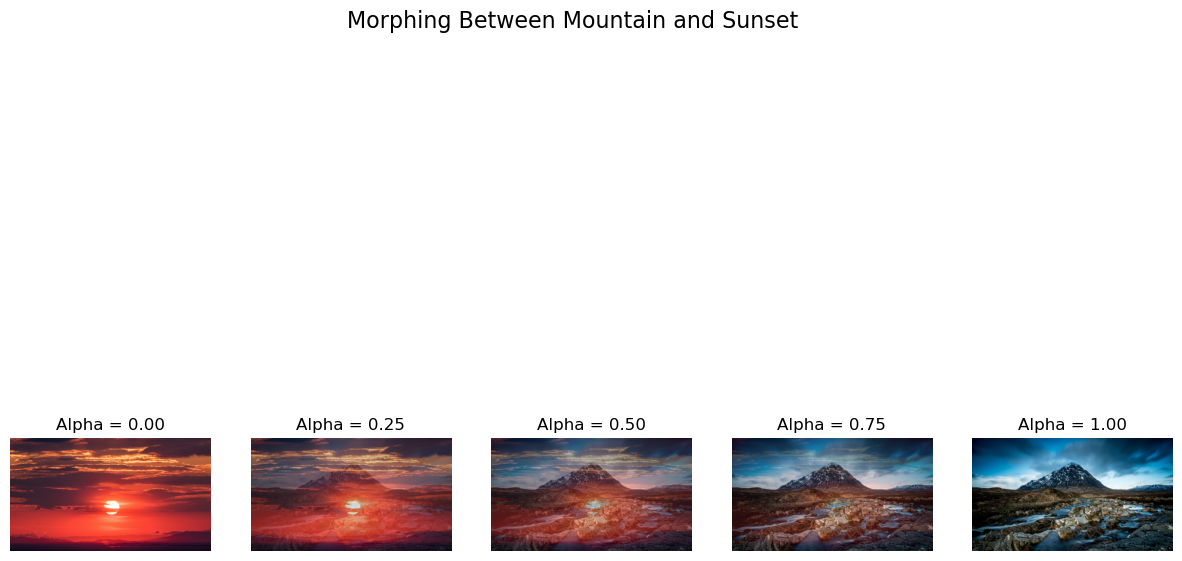

In [11]:
# Morphing with varying alpha values
alphas = np.linspace(0, 1, 5)  # Generate 5 steps between 0 and 1
plt.figure(figsize=(15, 10))

for i, alpha in enumerate(alphas):
    # Perform alpha blending for each step
    morphed = cv2.addWeighted(img1, alpha, img2, 1 - alpha, 0)
    plt.subplot(1, len(alphas), i + 1)
    plt.imshow(cv2.cvtColor(morphed, cv2.COLOR_BGR2RGB))
    plt.title(f"Alpha = {alpha:.2f}")
    plt.axis('off')

plt.suptitle("Morphing Between Mountain and Sunset", fontsize=16)
plt.show()
